## Homework 3

1) Load in the dataset https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv into a pandas dataframe

In [1]:
import pandas as pd
import statsmodels.api as sm
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
import pylab
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import re
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
pd.set_option('display.max_columns', 500)
%matplotlib inline
import random

df = pd.read_csv('https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv', index_col=0)
df.head()

C:\Users\CheeKHWQWJ\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\CheeKHWQWJ\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


2) Convert default and student to categorical variables.

In [2]:
 # Converting default and student to categorical vairables and extracting the column where Yes = 1 and No = 0
student = pd.get_dummies(df['student'])['Yes']
default = pd.get_dummies(df['default'])['Yes'] 
df1 = df.drop(['default', 'student'], axis = 1)
df1['default'] = default
df1['student'] = student
df1.head()                 

,balance,income,default,student
1,729.526495,44361.625074,0,0
2,817.180407,12106.134700,0,1
3,1073.549164,31767.138947,0,0
4,529.250605,35704.493935,0,0
5,785.655883,38463.495879,0,0


3) Make boxplots of all of the variables and a scatter plot of of (balance,income) with the color of the outcome of default labeled red if yes and blue if no

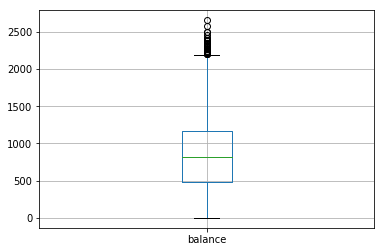

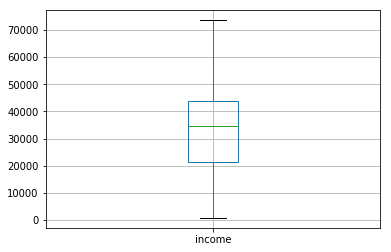

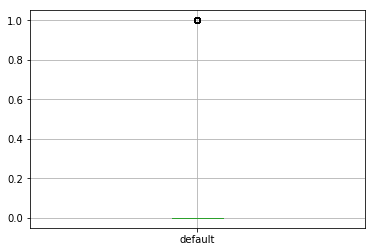

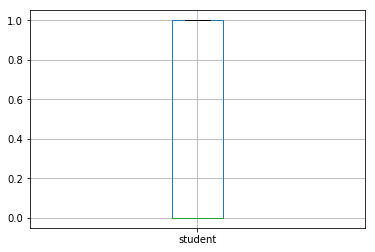

In [3]:
# Boxplot of all variables
df1[['balance']].boxplot() 
plt.show()
df1[['income']].boxplot() 
plt.show()
df1[['default']].boxplot() 
plt.show()
df1[['student']].boxplot() 
plt.show()

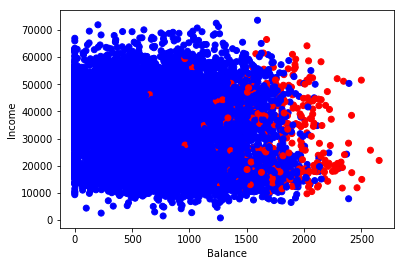

In [4]:
# Scatterplot of balance and income with color specified in question
colors=df1['default']
colors=colors.replace(1,'red').replace(0,'blue')
labels = ['yes','no']
plt.scatter(df1['balance'],df1['income'],c=colors)
plt.xlabel('Balance')
plt.ylabel('Income')
plt.show()

4) Train a model to predict if a student defaults on their loan or not using LogisticRegression based soley on the balance and income variables. Plot the decision boundary in the scatter plot you made in 3) and compute the AUC ROC.

Coefficents:  [[  5.41230026e-03   1.56431667e-05]]
Intercept:  [-11.00131434]


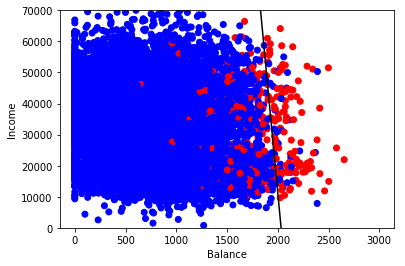

In [5]:
# Plot with decision boundary
X=df1[['balance','income']]
y=df1['default']
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=42)
classifier=LogisticRegression(penalty='l1')
classifier.fit(X_train, y_train)
coef = classifier.coef_
intercept = classifier.intercept_
print('Coefficents: ', coef)
print('Intercept: ', intercept)
x_plot=np.arange(0, 3000, 1)
y_plot=-(coef[:, 0] * x_plot + intercept) / coef[:,1]
plt.scatter(df1['balance'],df1['income'],c=colors)
plt.plot(x_plot, y_plot,c='black')
plt.xlabel('Balance')
plt.ylabel('Income')
plt.ylim(0, 70000)
plt.show()

Area under the ROC curve : 0.960591


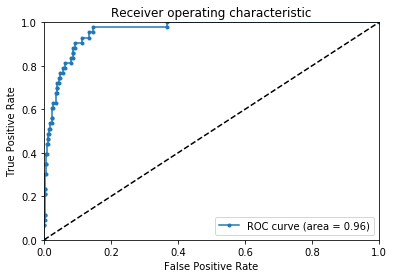

In [6]:
# Generating AUC ROC
X=df1[['balance','income']]
y=df1['default']
def generate_auc(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    random_state = np.random.RandomState(0)
    # Construct training and testing set.
    X, y = shuffle(X, y, random_state=random_state)
    n_samples, n_features = X.shape
    half = int(n_samples/1.2)
    X_train, X_test = X[:half], X[half:]
    y_train, y_test = y[:half], y[half:]
    
    # Choose SVC classifier.
    classifier = clf_class(**kwargs)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    print('Area under the ROC curve : %f' % roc_auc)
    return fpr, tpr, roc_auc, thresholds

# Generate ROC  for LR with l1 penalty and C=0.1
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,LogisticRegression,C=0.1,penalty='l1')
def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)

5) Repeat 4) but with the student variable included. Optimize using Ridge regression and plot the ranking of coefficients. How does performance improve with the added variable?

Coefficents:  [[  5.72984341e-03   4.84722974e-06  -5.02353919e-01]]
Intercept:  [-10.98281014]


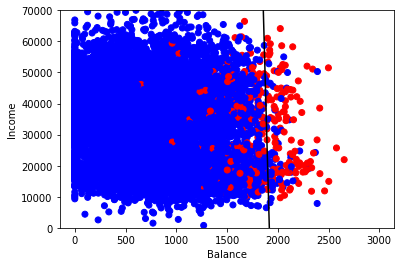

In [7]:
# Including the student variable
X=df1[['balance','income','student']]
y=df1['default']
scaler = StandardScaler()
X2=scaler.fit_transform(X)
X_train, X_test,y_train,y_test = train_test_split(X2,y, test_size = 0.2, random_state=42)
classifier=LogisticRegression(penalty='l1')
classifier.fit(X_train, y_train)
coef = classifier.coef_
intercept = classifier.intercept_
print('Coefficents: ', coef)
print('Intercept: ', intercept)
x_plot=np.arange(0, 3000, 1)
y_plot=-(coef[:, 0] * x_plot + intercept) / coef[:,1]
plt.scatter(df1['balance'],df1['income'],c=colors)
plt.plot(x_plot, y_plot,c='black')
plt.xlabel('Balance')
plt.ylabel('Income')
plt.ylim(0, 70000)
plt.show()

Area under the ROC curve : 0.962152


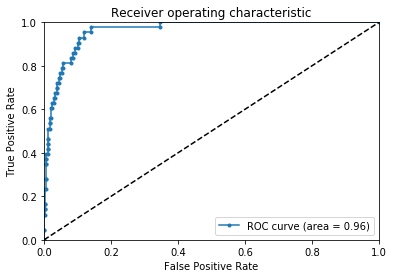

In [8]:
# AUC ROC with student variable
fpr,tpr,roc_auc, thresholds = generate_auc(X2,y,LogisticRegression,C=0.1,penalty='l1')
generate_ROCplot(fpr,tpr,'LR',roc_auc)

Having included the student variable, the AUC ROC increases from 0.960 to 0.962, implying that the inclusion of the student variable makes the logistic regression a better classifier. I will now additionally optimize using ridge regression

Area under the ROC curve : 0.948176
Area under the ROC curve : 0.948276
Area under the ROC curve : 0.948319
Area under the ROC curve : 0.948347
Area under the ROC curve : 0.948405
Area under the ROC curve : 0.948519
Area under the ROC curve : 0.948505
Area under the ROC curve : 0.948634
Area under the ROC curve : 0.948748
Area under the ROC curve : 0.948935
Area under the ROC curve : 0.949121
Area under the ROC curve : 0.949250
Area under the ROC curve : 0.949436
Area under the ROC curve : 0.949536
Area under the ROC curve : 0.949908
Area under the ROC curve : 0.950180
Area under the ROC curve : 0.950424
Area under the ROC curve : 0.950725
Area under the ROC curve : 0.951011
Area under the ROC curve : 0.951197
Area under the ROC curve : 0.951484
Area under the ROC curve : 0.951713
Area under the ROC curve : 0.952099
Area under the ROC curve : 0.952529
Area under the ROC curve : 0.952887
Area under the ROC curve : 0.953130
Area under the ROC curve : 0.953474
Area under the ROC curve : 0

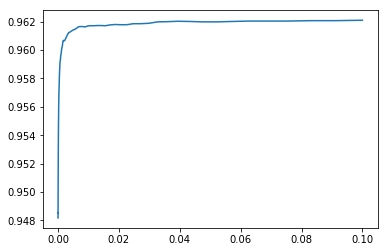

In [9]:
# Using Ridge Regression
alphas = np.logspace(-5, -1, 100)
scores = []
for alpha in alphas:
    fpr, tpr, roc_auc, thresholds= generate_auc(X2,y,LogisticRegression,C=alpha,penalty='l2')
    scores.append(roc_auc)
plt.plot(alphas,scores)
alpha_best = alphas[np.argmax(scores)]
print('Optimal Alpha: %.10f' % alpha_best)

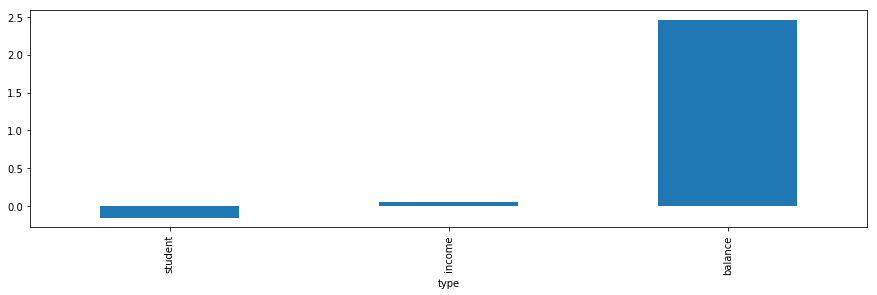

In [10]:
# Plotting feature importance
alpha = alphas[np.argmax(scores)]
regr = LogisticRegression(C=alpha,penalty='l1')

# Train the model using the training sets
regr.fit(X_train, y_train)
dfCoeffs = pd.DataFrame({'type':X.columns.values, 'coef':regr.coef_[0]})
plt.figure(figsize=(15,4
                   ))
dfCoeffs2 = dfCoeffs.groupby('type')['coef'].mean()
dfCoeffs2.sort_values()
dfCoeffs2[::-1].plot(kind='bar')

Area under the ROC curve : 0.962095


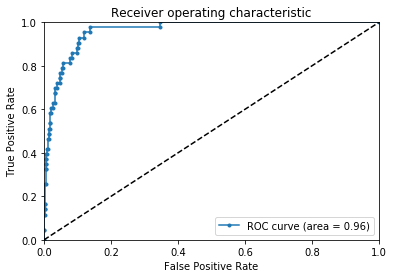

In [11]:
# AUC ROC with student variable and Ridge Regression
fpr,tpr,roc_auc, thresholds = generate_auc(X2,y,LogisticRegression,C=alpha_best,penalty='l2')
generate_ROCplot(fpr,tpr,'LR',roc_auc)

It can be seen that with student variable included and using Ridge Regression with optimal alpha to optimize, the AUC ROC is 0.962. which is still a slight improvement from 0.960 that was obtained without student as an additional variable (and also with Lasso Regression to optimize earlier).

6) Using cross validation, check that the model you built in 5) is robust (generalizes to other random folds of the dataset).

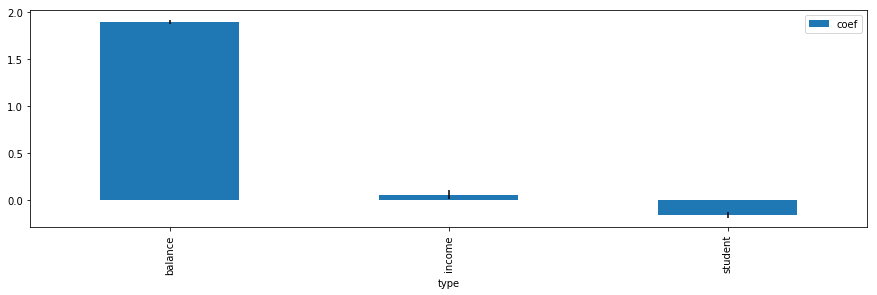

In [12]:
# Obtaining error bars for coefficients using cross validation
def run_cv_coeffs(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=5,shuffle=False)
    y_pred = y.copy()
    coeffs=[]
    # Iterate through folds
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
        #print clf.coef_[0]
        coeffs.append(clf.coef_)
    return coeffs

coeffs=run_cv_coeffs(X2,y.values,LogisticRegression,C=alpha_best,penalty='l2')
def get_coeffs(coeffs):
    coeffs_avgd = [(coeffs[0][0][i] + coeffs[1][0][i] + coeffs[2][0][i] + coeffs[3][0][i] + coeffs[4][0][i])/5 for i in range(0,len(X.columns))]
    coeffs_std = [np.std([coeffs[0][0][i],coeffs[1][0][i],coeffs[2][0][i],coeffs[3][0][i],coeffs[4][0][i]]) for i in range(0,len(X.columns))]
    return coeffs_avgd, coeffs_std

coeffs_avg,coeffs_std=get_coeffs(coeffs)
dfCoeffs = pd.DataFrame({'type':X.columns.values, 'coef':coeffs_avg, 'std':coeffs_std})


dfCoeffs_sorted = dfCoeffs.sort_values(['coef'])[::-1]
yerr_vals = dfCoeffs_sorted['std'].values
dfCoeffs_sorted.plot(x='type',y='coef',kind='bar',yerr=yerr_vals, figsize=(15,4))

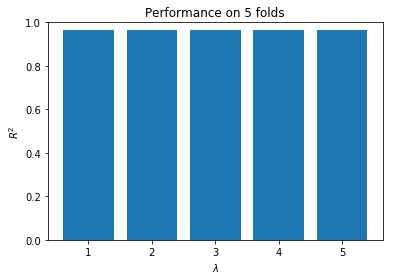

array([ 0.96651674,  0.96651674,  0.9665    ,  0.96598299,  0.96648324])

In [13]:
# Second check for cross validation
from sklearn.model_selection import cross_val_score
regr = LogisticRegression(C=alpha_best,penalty='l2')
scores = cross_val_score(regr, X, y, cv=5)
plt.ylim([0,1])
plt.xlabel('$\lambda$')
plt.ylabel('$R^2$')
plt.title('Performance on 5 folds')
plt.bar(range(1,6),scores)
plt.show()
scores

The robustness of the model built in 5 to other folds is proven by how the error band for the coefficients are not large and the R^2 values for the performances on 5 folds remain high and relatively the same of around 0.96-0.97.

7) Train a Decision Tree classifier with maximum depth 5 and plot the decision tree. How does performance compare?

In [14]:
print(__doc__)

# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import numpy.random as nprnd
import random
import seaborn
%matplotlib inline
from IPython.display import Image 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
# Create a random dataset
X=df1[['balance','income','student']]
y=df1['default']
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=42)
# Fit regression model
regr_0 = DecisionTreeRegressor(max_depth=1)
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_0.fit(X_train, y_train)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

# Predict
y_0 = regr_0.predict(X_test)
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

Automatically created module for IPython interactive environment


In [15]:
def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

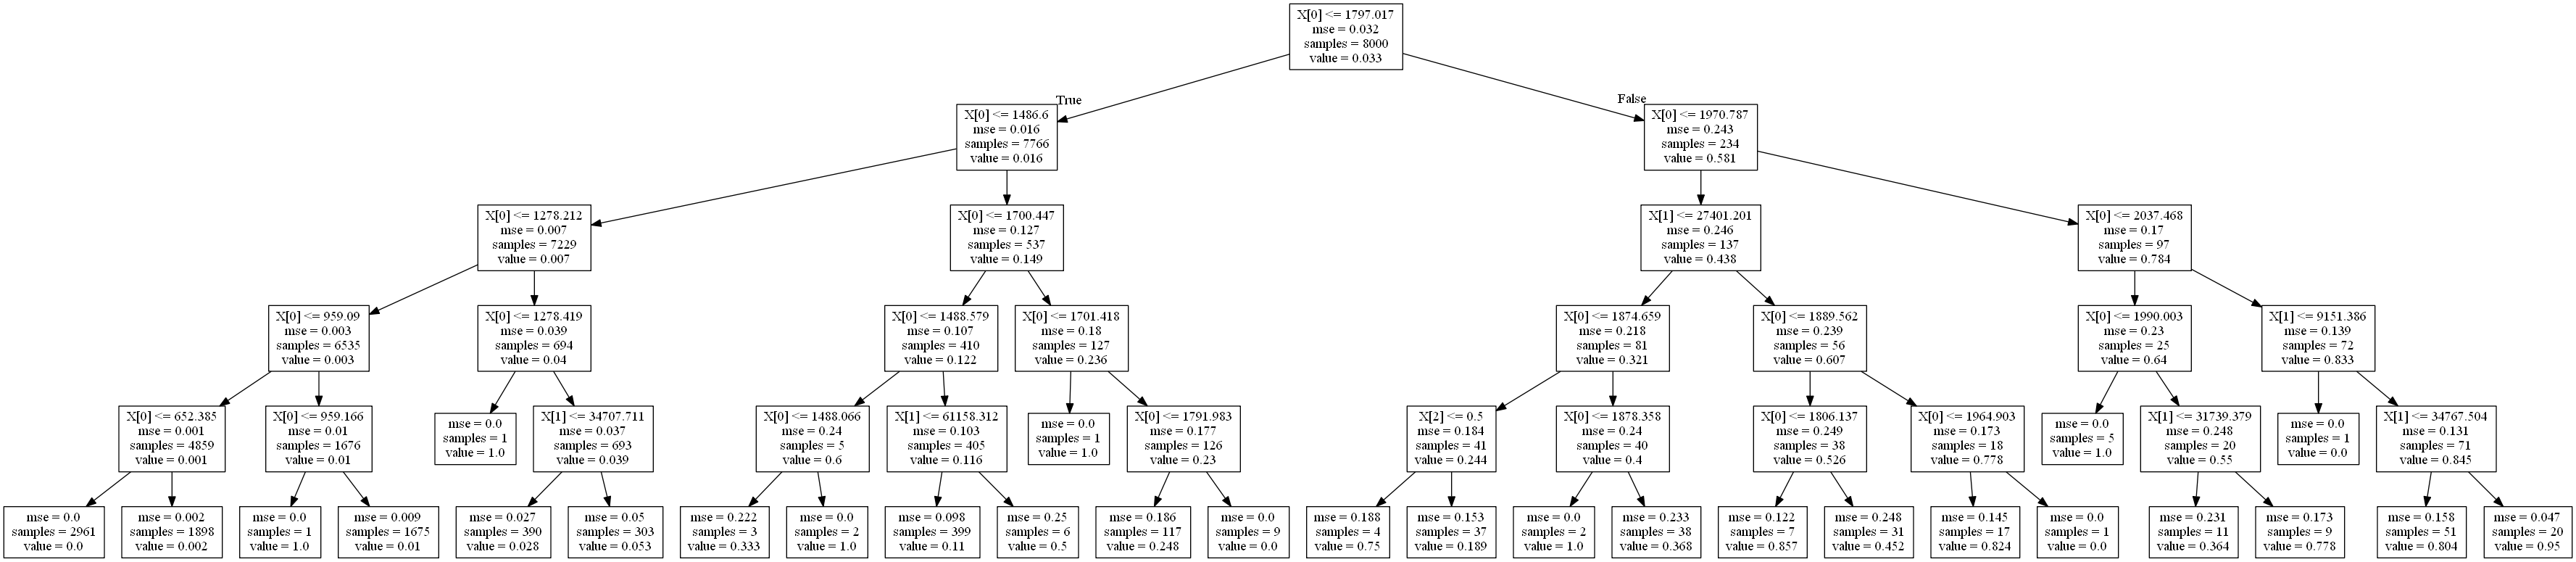

In [16]:
# Tree with Depth 5
visualize_tree(regr_2, feature_names=['x'])
dot_data=export_graphviz(regr_2, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [17]:
# AUC ROC for tree with depth 5
fpr, tpr, roc_auc, thresholds= generate_auc(X2,y,DecisionTreeClassifier,max_depth=5)

Area under the ROC curve : 0.932280


It can be seen that with a maximum depth of 5, the AUC ROC is 0.932 which is slightly worse than the 0.960 obtained by the Logistic Regression classifier. This may however not be the optimal dept and thus optimal AUC ROC by the decision tree method in general. The next question will find the optimal depth and compute the AUC ROC to make for a better comparison.

8) Find the optimal decision tree depth and compute the AUC ROC.

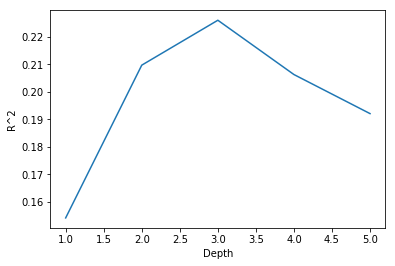

In [18]:
# Generating graph of optimal decision tree depth
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_errors=[]
test_errors=[]
scores=[]
depths = range(1,6)
for n in depths:
    regr = DecisionTreeRegressor(max_depth=n)
    # Train the model using the training sets
    regr.fit(X_train, y_train)
    train_errors.append(regr.score(X_train,y_train))
    scores.append(regr.score(X_test,y_test))
plt.ylabel('R^2')
plt.xlabel('Depth')
plt.plot(depths,scores)
test_errors=scores
n_opt=depths[np.argmax(scores)]
print()

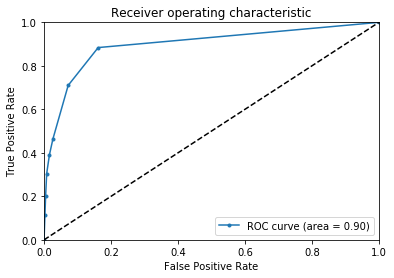

Area under the ROC curve : 0.951562


In [19]:
# AUC ROC of decision tree with optimal depth
regr_opt = DecisionTreeRegressor(max_depth=n_opt)
regr_opt.fit(X_train, y_train)

y_pred = regr_opt.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
generate_ROCplot(fpr,tpr,'Decision Tree',roc_auc)
fpr, tpr, roc_auc, thresholds= generate_auc(X,y,DecisionTreeClassifier,max_depth=n_opt)

With the optimal depth (of 3 as shown in the plot of R^2 against depth above), the AUC ROC increases to 0.952. This is still slightly below the AUC ROC of 0.960 obtained by Logistic Regression, thereby suggesting that Logistic Regression may be a better classifier for this dataset.